In [1]:
!git clone https://github.com/facebookresearch/segment-anything-2
%cd segment-anything-2
!pip install -q -e .
%cd ..

Cloning into 'segment-anything-2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 134.70 MiB | 48.18 MiB/s, done.
Resolving deltas: 100% (376/376), done.
/content/segment-anything-2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 14.3 kB/s eta 0:00:00
  Building editable for SAM-2 (pyproject.toml) ... done
/content


In [2]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ankanghosh651/leaf-sengmentation-dataset-sam2-format

Saving kaggle.json to kaggle.json
mv: cannot move 'kaggle.json' to '/root/kaggle/': Not a directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/ankanghosh651/leaf-sengmentation-dataset-sam2-format
License(s): MIT
 95% 49.0M/51.5M [00:00<00:00, 129MB/s] 
100% 51.5M/51.5M [00:00<00:00, 112MB/s]


In [3]:
! sudo apt-get install zip unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
zip is already the newest version (3.0-12build2).
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [4]:
!unzip leaf-sengmentation-dataset-sam2-format.zip

Archive:  leaf-sengmentation-dataset-sam2-format.zip
  inflating: leaf-seg/images/00000.jpg  
  inflating: leaf-seg/images/00001.jpg  
  inflating: leaf-seg/images/00002.jpg  
  inflating: leaf-seg/images/00003.jpg  
  inflating: leaf-seg/images/00004.jpg  
  inflating: leaf-seg/images/00005.jpg  
  inflating: leaf-seg/images/00006.jpg  
  inflating: leaf-seg/images/00007.jpg  
  inflating: leaf-seg/images/00008.jpg  
  inflating: leaf-seg/images/00009.jpg  
  inflating: leaf-seg/images/00010.jpg  
  inflating: leaf-seg/images/00011.jpg  
  inflating: leaf-seg/images/00012.jpg  
  inflating: leaf-seg/images/00013.jpg  
  inflating: leaf-seg/images/00014.jpg  
  inflating: leaf-seg/images/00015.jpg  
  inflating: leaf-seg/images/00016.jpg  
  inflating: leaf-seg/images/00017.jpg  
  inflating: leaf-seg/images/00018.jpg  
  inflating: leaf-seg/images/00019.jpg  
  inflating: leaf-seg/images/00020.jpg  
  inflating: leaf-seg/images/00021.jpg  
  inflating: leaf-seg/images/00022.jpg  
  in

In [5]:
!wget -O sam2_hiera_tiny.pt "https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_tiny.pt"
!wget -O sam2_hiera_small.pt "https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_small.pt"
!wget -O sam2_hiera_base_plus.pt "https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_base_plus.pt"
!wget -O sam2_hiera_large.pt "https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt"

--2025-03-11 23:25:07--  https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.171.22.68, 3.171.22.118, 3.171.22.13, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.171.22.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155906050 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2_hiera_tiny.pt’

sam2_hiera_tiny.pt  100%[===================>] 148.68M   153MB/s    in 1.0s    

2025-03-11 23:25:08 (153 MB/s) - ‘sam2_hiera_tiny.pt’ saved [155906050/155906050]

--2025-03-11 23:25:08--  https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.171.22.68, 3.171.22.118, 3.171.22.13, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.171.22.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184309650 (176M) [application/vnd.snesde

In [6]:
%cd segment-anything-2

/content/segment-anything-2


In [7]:
import os
import random
import pandas as pd
import cv2
import torch
import torch.nn.utils
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

In [8]:
def set_seeds():
  SEED_VALUE = 42
  random.seed(SEED_VALUE)
  np.random.seed(SEED_VALUE)
  torch.manual_seed(SEED_VALUE)
  if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED_VALUE)
    torch.cuda.manual_seed_all(SEED_VALUE)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
set_seeds()

In [9]:
data_dir = "/content/leaf-seg"
images_dir = os.path.join(data_dir, "images")
masks_dir = os.path.join(data_dir, "masks")

train_df = pd.read_csv(os.path.join(data_dir, "train.csv"))

train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)

train_data = []
for index, row in train_df.iterrows():
  image_name = row['imageid']
  mask_name = row['maskid']

  train_data.append({
      "image": os.path.join(images_dir, image_name),
      "annotation": os.path.join(masks_dir, mask_name)
  })

test_data = []
for index, row in test_df.iterrows():
  image_name = row['imageid']
  mask_name = row['maskid']

  test_data.append({
      "image": os.path.join(images_dir, image_name),
      "annotation": os.path.join(masks_dir, mask_name)
  })

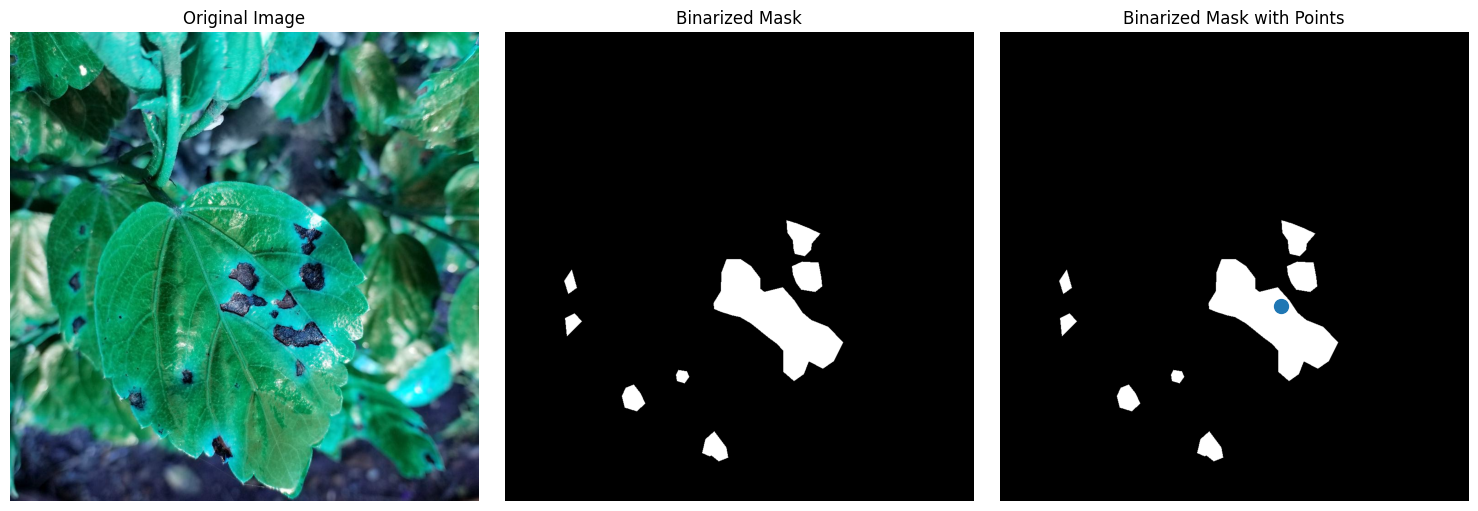

In [10]:
def read_batch(data, visualize_data = True):
  ent = data[np.random.randint(len(data))]

  Img = cv2.imread(ent["image"])[..., ::1]
  ann_map = cv2.imread(ent["annotation"], cv2.IMREAD_GRAYSCALE)

  if Img is None or ann_map is None:
    print(f"Error: Could not read image or mask from path {ent['image']} or {ent['annotation']}")
    return None, None, None, 0

  r = np.min([1024 / Img.shape[1], 1024 / Img.shape[0]])
  Img = cv2.resize(Img, (int(Img.shape[1] * r), int(Img.shape[0] * r)))
  ann_map = cv2.resize(ann_map, (int(ann_map.shape[1] * r), int(ann_map.shape[0] * r)), interpolation = cv2.INTER_NEAREST)

  binary_mask = np.zeros_like(ann_map, dtype = np.uint8)
  points = []

  inds = np.unique(ann_map)[1:]
  for ind in inds:
    mask = (ann_map == ind).astype(np.uint8)
    binary_mask = np.maximum(binary_mask, mask)

  eroded_mask = cv2.erode(binary_mask, np.ones((5, 5), np.uint8), iterations = 1)

  coords = np.argwhere(eroded_mask > 0)
  if len(coords) > 0:
    for _ in inds:
      yx = np.array(coords[np.random.randint(len(coords))])
      points.append([yx[1], yx[0]])

  points = np.array(points)

  if visualize_data:
       # Plotting the images and points
       plt.figure(figsize=(15, 5))

       # Original Image
       plt.subplot(1, 3, 1)
       plt.title('Original Image')
       plt.imshow(Img)
       plt.axis('off')

       # Segmentation Mask (binary_mask)
       plt.subplot(1, 3, 2)
       plt.title('Binarized Mask')
       plt.imshow(binary_mask, cmap='gray')
       plt.axis('off')

       # Mask with Points in Different Colors
       plt.subplot(1, 3, 3)
       plt.title('Binarized Mask with Points')
       plt.imshow(binary_mask, cmap='gray')

       # Plot points in different colors
       colors = list(mcolors.TABLEAU_COLORS.values())
       for i, point in enumerate(points):
           plt.scatter(point[0], point[1], c=colors[i % len(colors)], s=100, label=f'Point {i+1}')  # Corrected to plot y, x order

       # plt.legend()
       plt.axis('off')

       plt.tight_layout()
       plt.show()

  binary_mask = np.expand_dims(binary_mask, axis=-1)  # Now shape is (1024, 1024, 1)
  binary_mask = binary_mask.transpose((2, 0, 1))
  points = np.expand_dims(points, axis=1)

   # Return the image, binarized mask, points, and number of masks
  return Img, binary_mask, points, len(inds)

Img1, masks1, points1, num_masks = read_batch(train_data, visualize_data=True)


In [23]:
sam2_checkpoint = "../sam2_hiera_tiny.pt"
model_cfg = "sam2_hiera_t.yaml"

#sam2_checkpoint = "../sam2_hiera_base_plus.pt"  # bigger checkpoint
#model_cfg = "sam2_hiera_b+.yaml"

sam2_model = build_sam2(model_cfg, sam2_checkpoint, device="cuda")
predictor = SAM2ImagePredictor(sam2_model)

In [28]:
predictor.model.sam_mask_decoder.train(True)

predictor.model.sam_prompt_encoder.train(True)

scaler = torch.amp.GradScaler()

NO_OF_STEPS = 18000

FINE_TUNED_MODEL_NAME = "fine_tuned_sam2"

In [30]:
#To adapt?
optimizer = torch.optim.AdamW(params = predictor.model.parameters(), lr = 1e-4, weight_decay = 1e-4)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=300, gamma=0.6)

accumulation_steps = 4

#CHECKPOINT_START_STEP = 10000

#CHECKPOINT_INTERVAL   = 500

for step in range(1, NO_OF_STEPS + 1):
    with torch.amp.autocast(device_type = 'cuda'):
      image, mask, input_point, num_masks = read_batch(train_data, visualize_data = False)
      if image is None or mask is None or num_masks == 0:
        continue

      input_label = np.ones((num_masks, 1))
      if not isinstance(input_point, np.ndarray) or not isinstance(input_label, np.ndarray):
        continue

      if input_point.size == 0 or input_label.size == 0:
        continue

      predictor.set_image(image)
      mask_input, unnorm_coords, labels, unnorm_box = predictor._prep_prompts(input_point, input_label, box = None, mask_logits = None, normalize_coords = True)
      if unnorm_coords is None or labels is None or unnorm_coords.shape[0] == 0 or labels.shape[0] == 0:
        continue

      sparse_embeddings, dense_embeddings = predictor.model.sam_prompt_encoder(
          points = (unnorm_coords, labels), boxes = None, masks = None,
      )

      batched_mode = unnorm_coords.shape[0] > 1
      high_res_features = [feat_level[-1].unsqueeze(0) for feat_level in predictor._features["high_res_feats"]]
      low_res_masks, prd_scores, _, _ = predictor.model.sam_mask_decoder(
          image_embeddings = predictor._features["image_embed"][-1].unsqueeze(0),
          image_pe = predictor.model.sam_prompt_encoder.get_dense_pe(),
          sparse_prompt_embeddings = sparse_embeddings,
          dense_prompt_embeddings = dense_embeddings,
          multimask_output = True,
          repeat_image = batched_mode,
          high_res_features = high_res_features,
      )

      prd_masks = predictor._transforms.postprocess_masks(low_res_masks, predictor._orig_hw[-1])

      #gt_mask = torch.tensor(mask.astype(np.float32)).cuda()
      #prd_mask = torch.sigmoid(prd_masks[:, 0])

      #seg_loss = (-gt_mask * torch.log(prd_mask + 0.000001) - (1 - gt_mask) * torch.log((1 - prd_mask) + 0.00001)).mean()

      #inter = (gt_mask * (prd_mask > 0.5)).sum(1).sum(1)
      #iou = inter / (gt_mask.sum(1).sum(1) + (prd_mask > 0.5).sum(1).sum(1) - inter)
      #score_loss = torch.abs(prd_scores[:, 0] - iou).mean()
      #loss = seg_loss + score_loss * 0.05

      gt_mask = torch.tensor(mask.astype(np.float32)).cuda()
      prd_mask = torch.sigmoid(prd_masks[:, 0])

      seg_loss = (-gt_mask * torch.log(prd_mask + 1e-6) - (1 - gt_mask) * torch.log((1 - prd_mask) + 1e-6)).mean()

      inter = (gt_mask * (prd_mask > 0.5)).sum(1).sum(1)
      iou = inter / (gt_mask.sum(1).sum(1) + (prd_mask > 0.5).sum(1).sum(1) - inter)
      score_loss = torch.abs(prd_scores[:, 0] - iou).mean()
      loss = seg_loss + score_loss * 0.05

      loss = loss / accumulation_steps
      scaler.scale(loss).backward()

      torch.nn.utils.clip_grad_norm_(predictor.model.parameters(), max_norm = 1.0)

    if step % accumulation_steps == 0:
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()
        predictor.model.zero_grad()

    if step % 500 == 0:
        FINE_TUNED_MODEL = FINE_TUNED_MODEL_NAME + "_" + str(step) + ".pt"
        torch.save(predictor.model.state_dict(), FINE_TUNED_MODEL)

    #if step >= CHECKPOINT_START_STEP and step % CHECKPOINT_INTERVAL == 0:
        #FINE_TUNED_MODEL = FINE_TUNED_MODEL_NAME + "_" + str(step) + ".pt"
        #torch.save(predictor.model.state_dict(), FINE_TUNED_MODEL)

    if step == 1:
      mean_iou = 0

    mean_iou = mean_iou * 0.99 + 0.01 * np.mean(iou.cpu().detach().numpy())



    if step % 100 == 0:
      current_lr = optimizer.param_groups[0]["lr"]
      print(f"Step {step}: Current LR = {current_lr:.6f}, IoU = {mean_iou:.6f}, Seg Loss = {seg_loss:.6f}")


Step 100: Current LR = 0.000100, IoU = 0.420443, Seg Loss = 0.272553
Step 200: Current LR = 0.000100, IoU = 0.554512, Seg Loss = 0.025172
Step 300: Current LR = 0.000100, IoU = 0.619364, Seg Loss = 0.078734
Step 400: Current LR = 0.000100, IoU = 0.635196, Seg Loss = 0.100111
Step 500: Current LR = 0.000100, IoU = 0.633415, Seg Loss = 0.060695
Step 600: Current LR = 0.000100, IoU = 0.663939, Seg Loss = 0.067231
Step 700: Current LR = 0.000100, IoU = 0.655063, Seg Loss = 0.027620
Step 800: Current LR = 0.000100, IoU = 0.639794, Seg Loss = 0.263679
Step 900: Current LR = 0.000100, IoU = 0.648207, Seg Loss = 0.047587
Step 1000: Current LR = 0.000100, IoU = 0.649963, Seg Loss = 0.110069
Step 1100: Current LR = 0.000100, IoU = 0.678420, Seg Loss = 0.015119
Step 1200: Current LR = 0.000060, IoU = 0.669051, Seg Loss = 0.030807
Step 1300: Current LR = 0.000060, IoU = 0.662858, Seg Loss = 0.323897
Step 1400: Current LR = 0.000060, IoU = 0.669610, Seg Loss = 0.122439
Step 1500: Current LR = 0.000

In [31]:
def read_image(image_path, mask_path):
  img = cv2.imread(image_path)[..., ::-1]
  mask = cv2.imread(mask_path, 0)
  r = np.min([1024 / img.shape[1], 1024 / img.shape[0]])
  img = cv2.resize(img, (int(img.shape[1] * r), int(img.shape[0] * r)))
  mask = cv2.resize(mask, (int(mask.shape[1] * r), int(mask.shape[0] * r)), interpolation = cv2.INTER_NEAREST)
  return img, mask

def get_points(mask, num_points):
  points = []
  coords = np.argwhere(mask > 0)
  for i in range(num_points):
    yx = np.array(coords[np.random.randint(len(coords))])
    points.append([[yx[1], yx[0]]])
  return np.array(points)



{'image': '/content/leaf-seg/images/00104.jpg', 'annotation': '/content/leaf-seg/masks/00104.png'}
/content/leaf-seg/masks/00104.png mask path


<ipython-input-32-bdf723e13347>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  predictor.model.load_state_dict(torch.load(FINE_TUNED_MODEL_WEIGHTS))


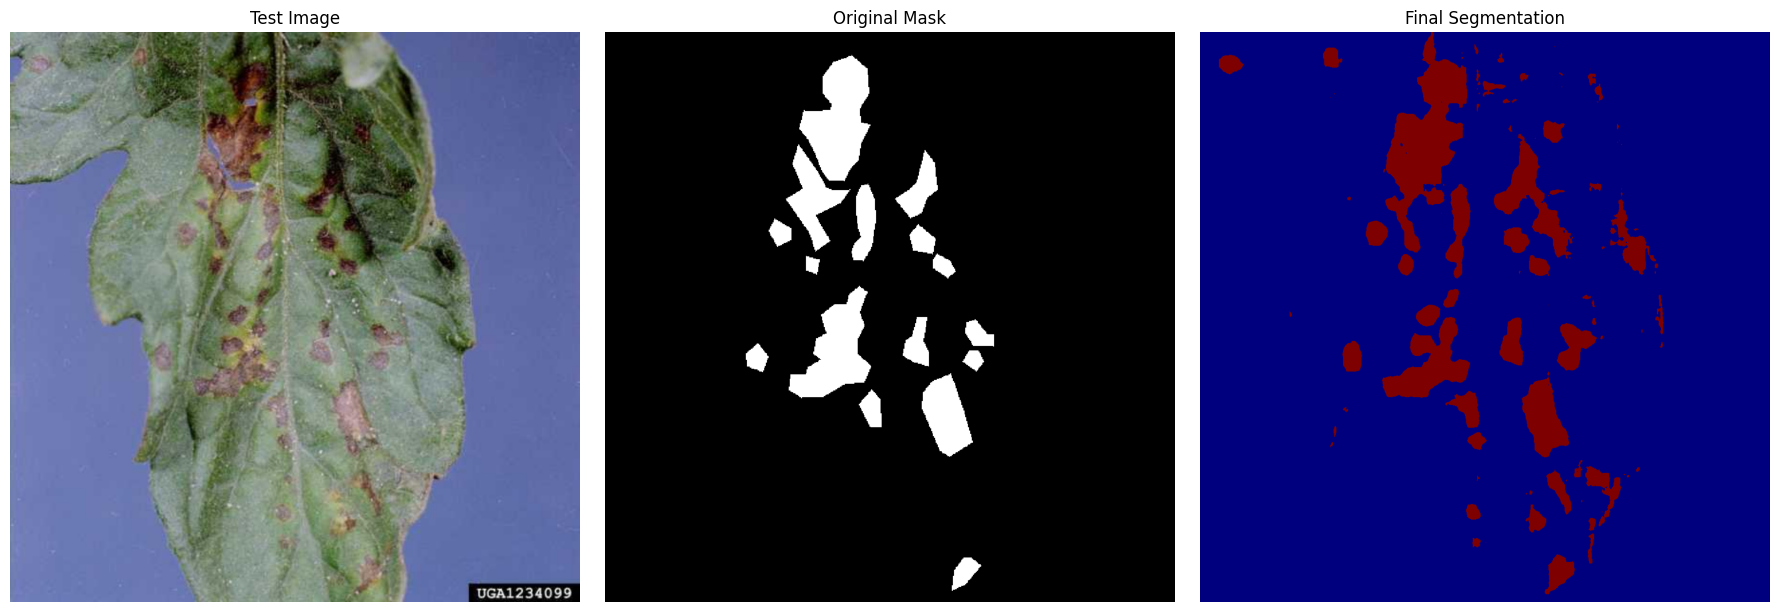

In [32]:
selected_entry = random.choice(test_data)
print(selected_entry)
image_path = selected_entry['image']
mask_path = selected_entry['annotation']
print(mask_path, 'mask path')

image, target_mask = read_image(image_path, mask_path)

num_samples = 30
input_points = get_points(target_mask, num_samples)

FINE_TUNED_MODEL_WEIGHTS = "fine_tuned_sam2_14500.pt"
sam2_model = build_sam2(model_cfg, sam2_checkpoint, device = "cuda")

predictor = SAM2ImagePredictor(sam2_model)
predictor.model.load_state_dict(torch.load(FINE_TUNED_MODEL_WEIGHTS))

with torch.no_grad():
  predictor.set_image(image)
  masks, scores, logits = predictor.predict(
      point_coords = input_points,
      point_labels = np.ones([input_points.shape[0], 1])
  )

np_masks = np.array(masks[:, 0])
np_scores = scores[:, 0]
sorted_masks = np_masks[np.argsort(np_scores)][::-1]

seg_map = np.zeros_like(sorted_masks[0], dtype = np.uint8)
occupancy_mask = np.zeros_like(sorted_masks[0], dtype = bool)

for i in range (sorted_masks.shape[0]):
  mask = sorted_masks[i]
  if (mask * occupancy_mask).sum() / mask.sum() > 0.15:
    continue

  mask_bool = mask.astype(bool)
  mask_bool[occupancy_mask] = False
  seg_map[mask_bool] = i + 1
  occupancy_mask[mask_bool] = True

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Test Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Original Mask')
plt.imshow(target_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Final Segmentation')
plt.imshow(seg_map, cmap='jet')
plt.axis('off')

plt.tight_layout()
plt.show()